# Regresja logistyczna w sklearn
Przeprowadź na zbiorze train.csv trening modelu regresji logistycznej. Wykorzystaj bibliotekę scikit-learn. Oblicz macierz pomyłek na zbiorze danych test.csv. Wyświetl punkty ze zbioru test.csv na wykresie wraz z prostą rozdzielającą klasy wyznaczoną przez model. Punkty z różnych klas powinny być pokolorowane odmiennie.

In [61]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
seed = 42
%matplotlib inline


In [3]:
data = pd.read_csv('data/data.csv').drop(columns = ['indeks'])
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
data.describe()


x1           x2           t
count  1000.000000  1000.000000  1000.00000
mean     -0.891980     3.136511     0.50000
std       6.573855     6.582337     0.50025
min     -19.533299   -14.152343     0.00000
25%      -5.831054    -1.707613     0.00000
50%      -0.516831     3.005504     0.50000
75%       4.149757     7.448845     1.00000
max      21.111443    24.751746     1.00000

In [10]:
prof = ProfileReport(data)
display(prof)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
train.t.value_counts()

0.0    402
1.0    398
Name: t, dtype: int64

In [29]:
train.isna().sum()

x1    0
x2    0
t     0
dtype: int64

In [20]:
X_train, y_train = train.drop(columns = ['t']), train[['t']].astype(int)
X_test, y_test = test.drop(columns = ['t']), test[['t']].astype(int)

In [41]:
lr = LogisticRegression(random_state = seed)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

/opt/miniconda3/envs/bp/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[96,  2],
       [ 5, 97]])

<Axes: >

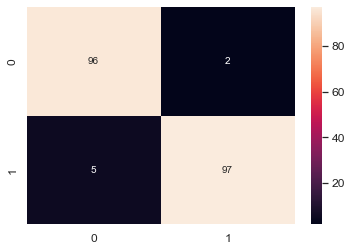

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)

/opt/miniconda3/envs/bp/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


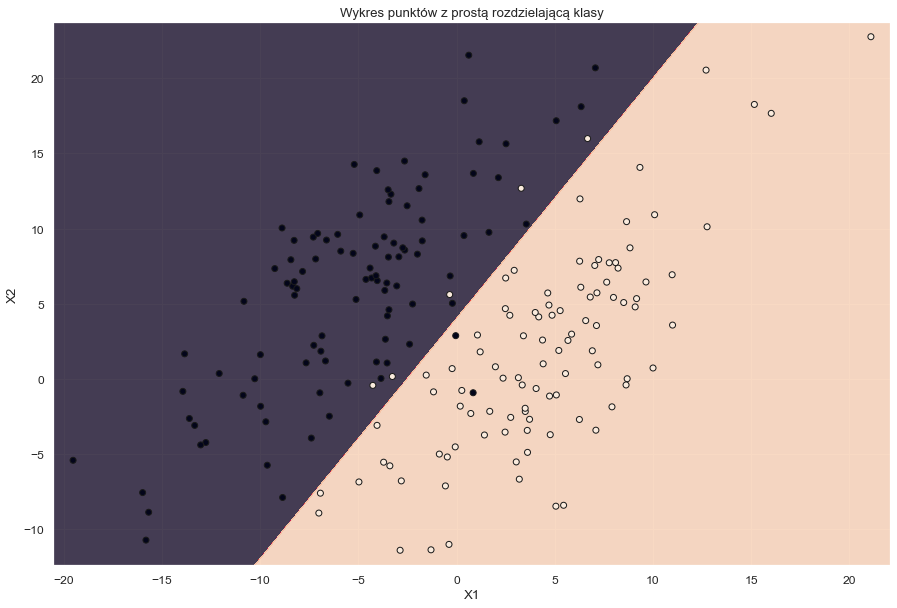

In [74]:
x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test.t, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Wykres punktów z prostą rozdzielającą klasy')
plt.show()